<a href="https://colab.research.google.com/github/AI4Finance-LLC/FinRL-Library/blob/master/FinRL_single_stock_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Reinforcement Learning for Stock Trading from Scratch: Single Stock Trading

Tutorials to use OpenAI DRL to trade single stock in one Jupyter Notebook | Presented at NeurIPS 2020: Deep RL Workshop

* This blog is based on our paper: FinRL: A Deep Reinforcement Learning Library for Automated Stock Trading in Quantitative Finance, presented at NeurIPS 2020: Deep RL Workshop.
* Check out medium blog for detailed explanations: 
* Please report any issues to our Github: https://github.com/AI4Finance-LLC/FinRL-Library/issues



## Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Python packages](#1)
    * [2.1. Install Packages](#1.1)    
    * [2.2. Check Additional Packages](#1.2)
    * [2.3. Import Packages](#1.3)
    * [2.4. Create Folders](#1.4)
* [3. Download Data](#2)
* [4. Preprocess Data](#3)        
    * [4.1. Technical Indicators](#3.1)
    * [4.2. Perform Feature Engineering](#3.2)
* [5.Testing the Model](#4)  
    * [5.1. Training & Trade Data Split](#4.1)
    * [5.2. User-defined Environment](#4.2)   
    * [5.3. Initialize Environment](#4.3)    
* [6.Implement DRL Algorithms](#5)  
* [7.Backtest Our Strategy](#6)  
    * [7.1. BackTestStats](#6.1)
    * [7.2. BackTestPlot](#6.2)   
    * [7.3. Baseline Stats](#6.3)   
    * [7.3. Compare to Stock Market Index](#6.4)             

<a id='0'></a>
# Part 1. Problem Definition

This problem is to design an automated trading solution for single stock trading. We model the stock trading process as a Markov Decision Process (MDP). We then formulate our trading goal as a maximization problem.

The algorithm is trained using Deep Reinforcement Learning (DRL) algorithms and the components of the reinforcement learning environment are:


* Action: The action space describes the allowed actions that the agent interacts with the
environment. Normally, a ∈ A includes three actions: a ∈ {−1, 0, 1}, where −1, 0, 1 represent
selling, holding, and buying one stock. Also, an action can be carried upon multiple shares. We use
an action space {−k, ..., −1, 0, 1, ..., k}, where k denotes the number of shares. For example, "Buy
10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or −10, respectively

* Reward function: r(s, a, s′) is the incentive mechanism for an agent to learn a better action. The change of the portfolio value when action a is taken at state s and arriving at new state s',  i.e., r(s, a, s′) = v′ − v, where v′ and v represent the portfolio
values at state s′ and s, respectively

* State: The state space describes the observations that the agent receives from the environment. Just as a human trader needs to analyze various information before executing a trade, so
our trading agent observes many different features to better learn in an interactive environment.

* Environment: single stock trading for AAPL


The data of the single stock that we will be using for this case study is obtained from Yahoo Finance API. The data contains Open-High-Low-Close price and volume.

We use Apple Inc. stock: AAPL as an example throughout this article, because it is one of the most popular and profitable stocks.

<a id='1'></a>
# Part 2. Getting Started- Loading the data and python packages


<a id='1.1'></a>
## 2.1. Install all the packages through FinRL library


In [ ]:
## install finrl library
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-61od432g
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-61od432g
     |████████████████████████████████| 153kB 5.0MB/s 
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-ad88an_6/pyfolio
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-ad88an_6/pyfolio
     |████████████████████████████████| 5.5MB 6.3MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
  Created wheel for finrl: filename=finrl-0.3.0-cp37-none-any.whl size=38749 sha256=4bf918c2a89bd1f488756755614701867227fb068ccbdaa0b78c26b9c96e61ee
  Stored in directory: /tmp/pip-ephem-wheel-cache-drtwtor6/wheels/9c/19/bf/c644def96612df1ad42c94d5304966797eaa3221dffc5efe0b
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=dfcf5a8015dcb3b09028b39b034f750f772c1687ec8a63a0d69e87edb12e2ab8
  


<a id='1.2'></a>
## 2.2. Check if the additional packages needed are present, if not install them. 
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio
* python-binance

In [ ]:
import pkg_resources
import pip
installedPackages = {pkg.key for pkg in pkg_resources.working_set}
required = {'yfinance', 'pandas', 'matplotlib', 'stockstats','stable-baselines','gym','tensorflow', 'python-binance'}
missing = required - installedPackages
if missing:
    !pip install yfinance
    !pip install pandas
    !pip install matplotlib
    !pip install stockstats
    !pip install gym
    !pip install stable-baselines[mpi]
    !pip install tensorflow==1.15.4
    !pip install python-binance

     |████████████████████████████████| 245kB 5.2MB/s 
     |████████████████████████████████| 1.4MB 17.7MB/s 
  Created wheel for mpi4py: filename=mpi4py-3.0.3-cp37-cp37m-linux_x86_64.whl size=2065195 sha256=4e5f0705f780a261e2113a609917669d0a29fd77a73cb4c631e22883313f8a66
  Stored in directory: /root/.cache/pip/wheels/18/e0/86/2b713dd512199096012ceca61429e12b960888de59818871d6
Successfully built mpi4py
     |████████████████████████████████| 110.5MB 49kB/s 
     |████████████████████████████████| 51kB 4.1MB/s 
     |████████████████████████████████| 3.8MB 42.3MB/s 
     |████████████████████████████████| 20.1MB 1.3MB/s 
     |████████████████████████████████| 512kB 43.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=7299d57ac383a7f9aab09abccfa9f056b57fe1899f28d68251c72417c890f49f
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 h

     |████████████████████████████████| 61kB 4.6MB/s 
     |████████████████████████████████| 501kB 23.6MB/s 
     |████████████████████████████████| 3.2MB 40.1MB/s 
     |████████████████████████████████| 184kB 47.1MB/s 
     |████████████████████████████████| 286kB 49.4MB/s 
     |████████████████████████████████| 3.1MB 26.8MB/s 
     |████████████████████████████████| 81kB 6.5MB/s 
     |████████████████████████████████| 256kB 38.7MB/s 


<a id='1.3'></a>
## 2.3. Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
import datetime

from finrl.config import config
from finrl.marketdata.yahoodownloader import YahooDownloader
from finrl.preprocessing.preprocessors import FeatureEngineer
from finrl.preprocessing.data import data_split
from finrl.env.env_stocktrading import StockTradingEnv
from finrl.model.models import DRLAgent
# from finrl.trade.backtest import BackTestStats, BaselineStats, BackTestPlot
from finrl.trade.backtest import backtest_stats, backtest_plot, get_baseline



In [ ]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

<a id='1.4'></a>
## 2.4. Create Folders

In [ ]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

<a id='2'></a>
# Part 3. Download Data
Binance is a cryptocurrency exchange with free APIs which we will use to download Bitcoin price data from the trading pair BTC/USDT. Generate API keys: https://www.binance.com/en/support/faq/360002502072-How-to-create-API


In [ ]:
# Download and save the data in a pandas DataFrame:
from binance.client import Client
import pandas as pd

apikey = ""
apikeysecret = ""

# initialize the client with our credentials
client = Client(apikey, apikeysecret)
# get the 1 day length OHLC candles for BTCUSDT going back 1 year
    # https://python-binance.readthedocs.io/en/latest/binance.html#binance.client.Client.get_historical_klines
klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1DAY, "1 year ago UTC")
data_df = pd.DataFrame(data=klines, columns=['time','open', 'high', 'low', 'close',
                                      'volume', 'close_time', 'qav', 'num_trades',
                                      'bbav', 'bqav', 'ig']).drop(columns=['close_time', 'ig'])

In [ ]:
data_df

,time,open,high,low,close,volume,qav,num_trades,bbav,bqav
0,1586869200000,6839.40000000,6868.38000000,6836.57000000,6862.04000000,908.76361600,6232222.45430678,8541,459.74029300,3152958.80297309
1,1586870100000,6861.93000000,6878.12000000,6850.00000000,6872.05000000,881.46806600,6051820.34944479,7484,491.31331100,3373751.85274342
2,1586871000000,6872.52000000,6889.97000000,6858.28000000,6877.93000000,1040.01484300,7152330.06557088,8408,499.01162800,3431816.04296653
3,1586871900000,6878.42000000,6889.85000000,6867.34000000,6887.89000000,567.10452600,3901015.73694625,4973,299.69966100,2062017.36898486
4,1586872800000,6888.81000000,6949.00000000,6878.02000000,6915.87000000,2524.05476300,17470443.02658506,18057,1480.45018000,10244422.28389354
...,...,...,...,...,...,...,...,...,...,...
34977,1618400700000,64590.00000000,64655.99000000,64456.41000000,64511.21000000,845.78059400,54590993.97356398,22463,433.27683800,27965975.71644123
34978,1618401600000,64509.48000000,64640.58000000,64127.40000000,64178.58000000,1019.90867000,65633952.97646468,25252,434.42639700,27961520.56116378
34979,1618402500000,64178.58000000,64368.94000000,63944.36000000,64187.36000000,1219.85270300,78244215.32073535,27546,613.09694600,39328227.20750741
34980,1618403400000,64187.98000000,64288.86000000,64062.57000000,64267.32000000,693.37429700,44519844.28859085,19548,328.55423900,21095635.58292514


In [ ]:
#date	open	high	low	close	volume	tic
import pandas as pd
#data_df = pd.read_pickle("BTCUSDT_2y15m.pkl").drop(columns=['close_time','qav','num_trades','bbav','bqav','aroondown','aroonup','OBV'])
type(data_df)


pandas.core.frame.DataFrame

In [ ]:
data_df.columns = ['date', 'open','high','low','close','volume', 'qav', 'num_trades', 'bbav', 'bqav']
data_df['tic'] = "BTCUSDT"

In [ ]:
data_df.shape

(34982, 11)

In [ ]:
data_df.head()

,date,open,high,low,close,volume,qav,num_trades,bbav,bqav,tic
0,1586869200000,6839.40000000,6868.38000000,6836.57000000,6862.04000000,908.76361600,6232222.45430678,8541,459.74029300,3152958.80297309,BTCUSDT
1,1586870100000,6861.93000000,6878.12000000,6850.00000000,6872.05000000,881.46806600,6051820.34944479,7484,491.31331100,3373751.85274342,BTCUSDT
2,1586871000000,6872.52000000,6889.97000000,6858.28000000,6877.93000000,1040.01484300,7152330.06557088,8408,499.01162800,3431816.04296653,BTCUSDT
3,1586871900000,6878.42000000,6889.85000000,6867.34000000,6887.89000000,567.10452600,3901015.73694625,4973,299.69966100,2062017.36898486,BTCUSDT
4,1586872800000,6888.81000000,6949.00000000,6878.02000000,6915.87000000,2524.05476300,17470443.02658506,18057,1480.45018000,10244422.28389354,BTCUSDT


In [ ]:
import time

start = time.time()



In [ ]:
data_df['open'] = data_df['open'].astype(float)
data_df['high'] = data_df['high'].astype(float)
data_df['low'] = data_df['low'].astype(float)
data_df['close'] = data_df['close'].astype(float)
data_df['volume'] = data_df['volume'].astype(float)

<a id='3'></a>
# Part 4. Preprocess Data
Data preprocessing is a crucial step for training a high quality machine learning model. We need to check for missing data and do feature engineering in order to convert the data into a model-ready state.
* FinRL uses a class **FeatureEngineer** to preprocess the data
* Add **technical indicators**. In practical trading, various information needs to be taken into account, for example the historical stock prices, current holding shares, technical indicators, etc.


class FeatureEngineer:
Provides methods for preprocessing the stock price data

    Attributes
    ----------
        df: DataFrame
            data downloaded from Yahoo API
        feature_number : int
            number of features we used
        use_technical_indicator : boolean
            we technical indicator or not
        use_turbulence : boolean
            use turbulence index or not

    Methods
    -------
    preprocess_data()
        main method to do the feature engineering

<a id='3.1'></a>

## 4.1 Technical Indicators
* FinRL uses stockstats to calcualte technical indicators such as **Moving Average Convergence Divergence (MACD)**, **Relative Strength Index (RSI)**, **Average Directional Index (ADX)**, **Commodity Channel Index (CCI)** and other various indicators and stats.
* **stockstats**: supplies a wrapper StockDataFrame based on the **pandas.DataFrame** with inline stock statistics/indicators support.



In [ ]:
## we store the stockstats technical indicator column names in config.py
## check https://pypi.org/project/stockstats/ for different names
config.TECHNICAL_INDICATORS_LIST

['macd',
 'boll_ub',
 'boll_lb',
 'rsi_30',
 'cci_30',
 'dx_30',
 'close_30_sma',
 'close_60_sma']

<a id='3.2'></a>
## 4.2 Perform Feature Engineering

In [ ]:
#data_df = FeatureEngineer(data_df.copy(),
##                          tech_indicator_list = config.TECHNICAL_INDICATORS_LIST,
 #                         use_turbulence=True,
 #                         user_defined_feature = True).preprocess_data()
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = config.TECHNICAL_INDICATORS_LIST,
                    use_turbulence=False,
                    user_defined_feature = False)

data_df = fe.preprocess_data(data_df)

Successfully added technical indicators


In [ ]:
data_df.head()

,date,open,high,low,close,volume,qav,num_trades,bbav,bqav,tic,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,1586869200000,6839.40,6868.38,6836.57,6862.04,908.763616,6232222.45430678,8541,459.74029300,3152958.80297309,BTCUSDT,0.000000,6881.201278,6852.888722,100.0,66.666667,100.0,6862.040000,6862.040000
1,1586870100000,6861.93,6878.12,6850.00,6872.05,881.468066,6051820.34944479,7484,491.31331100,3373751.85274342,BTCUSDT,0.224583,6881.201278,6852.888722,100.0,66.666667,100.0,6867.045000,6867.045000
2,1586871000000,6872.52,6889.97,6858.28,6877.93,1040.014843,7152330.06557088,8408,499.01162800,3431816.04296653,BTCUSDT,0.468502,6886.741243,6854.605423,100.0,92.237740,100.0,6870.673333,6870.673333
3,1586871900000,6878.42,6889.85,6867.34,6887.89,567.104526,3901015.73694625,4973,299.69966100,2062017.36898486,BTCUSDT,0.927561,6896.623102,6853.331898,100.0,90.874159,100.0,6874.977500,6874.977500
4,1586872800000,6888.81,6949.00,6878.02,6915.87,2524.054763,17470443.02658506,18057,1480.45018000,10244422.28389354,BTCUSDT,2.270869,6924.255347,6842.056653,100.0,153.936328,100.0,6883.156000,6883.156000


In [ ]:
end = time.time()
print("Processing took " + str(end - start))
start = time.time()

Processing took 16.408774852752686


<a id='4'></a>
# Part 5. Design Environment
Considering the stochastic and interactive nature of the automated stock trading tasks, a financial task is modeled as a **Markov Decision Process (MDP)** problem. The training process involves observing stock price change, taking an action and reward's calculation to have the agent adjusting its strategy accordingly. By interacting with the environment, the trading agent will derive a trading strategy with the maximized rewards as time proceeds.

Our trading environments, based on OpenAI Gym framework, simulate live stock markets with real market data according to the principle of time-driven simulation.

The action space describes the allowed actions that the agent interacts with the environment. Normally, action a includes three actions: {-1, 0, 1}, where -1, 0, 1 represent selling, holding, and buying one share. Also, an action can be carried upon multiple shares. We use an action space {-k,…,-1, 0, 1, …, k}, where k denotes the number of shares to buy and -k denotes the number of shares to sell. For example, "Buy 10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or -10, respectively. The continuous action space needs to be normalized to [-1, 1], since the policy is defined on a Gaussian distribution, which needs to be normalized and symmetric.

<a id='4.1'></a>
## 5.1 Training & Trade data split
* Training: 2009-01-01 to 2018-12-31
* Trade: 2019-01-01 to 2020-09-30

In [ ]:
import math

In [ ]:
#70% train, 30% test
test = math.floor(0.15*len(data_df))

#train = data_split(data_df, start = config.START_DATE, end = config.START_TRADE_DATE)
#trade = data_split(data_df, start = config.START_TRADE_DATE, end = config.END_DATE)
#train = data_split(data_df, start = '2009-01-01', end = '2019-01-01')
#trade = data_split(data_df, start = '2019-01-01', end = '2020-09-30')
trade = data_df.tail(test)
train = data_df.head(len(data_df) - test)
trade = trade.reset_index().drop(columns=['index'])
trade

,date,open,high,low,close,volume,qav,num_trades,bbav,bqav,tic,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,1613677500000,52019.98,52019.99,51685.00,51760.01,516.357525,26761103.43815323,16841,217.53258000,11273356.44937020,BTCUSDT,41.600438,52186.932895,51600.539105,49.171495,-8.789694,11.197998,51851.457333,51798.446667
1,1613678400000,51760.01,51896.55,51514.26,51896.55,784.516138,40580929.66394091,20925,339.79691600,17578201.89180762,BTCUSDT,36.908223,52174.958154,51600.342846,50.901179,-40.657028,20.469412,51862.320000,51794.693833
2,1613679300000,51896.60,52085.24,51889.41,52054.85,775.551026,40322873.25949251,19925,352.14548400,18307189.16137858,BTCUSDT,45.439300,52188.312608,51621.855392,52.826495,71.788535,7.242257,51881.993000,51791.428667
3,1613680200000,52054.85,52088.00,51864.30,51919.61,497.466668,25874943.40257058,15693,219.80672500,11433164.13937014,BTCUSDT,40.816989,52173.564357,51664.429643,51.057062,39.970343,8.668753,51898.386333,51787.123500
4,1613681100000,51919.61,52115.92,51830.00,52111.89,551.660694,28678148.74948093,16380,266.75162100,13866642.88839259,BTCUSDT,52.068945,52160.441917,51730.212083,53.355007,72.990443,10.674639,51914.618000,51786.154833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5242,1618400700000,64590.00,64655.99,64456.41,64511.21,845.780594,54590993.97356398,22463,433.27683800,27965975.71644123,BTCUSDT,108.704090,64890.668571,63409.956429,57.896475,80.709533,15.040760,64216.095667,63766.806667
5243,1618401600000,64509.48,64640.58,64127.40,64178.58,1019.908670,65633952.97646468,25252,434.42639700,27961520.56116378,BTCUSDT,98.000249,64838.889511,63419.499489,53.966542,26.190730,0.100711,64224.557667,63784.124000
5244,1618402500000,64178.58,64368.94,63944.36,64187.36,1219.852703,78244215.32073535,27546,613.09694600,39328227.20750741,BTCUSDT,89.197636,64814.397627,63420.511373,54.051706,-9.961042,7.076051,64221.837333,63803.743167
5245,1618403400000,64187.98,64288.86,64062.57,64267.32,693.374297,44519844.28859085,19548,328.55423900,21095635.58292514,BTCUSDT,87.663080,64800.581952,63422.285048,54.838846,0.691108,7.076051,64217.414333,63823.444333


In [ ]:
len(train)

29735

<a id='4.2'></a>
## 5.2 User-defined Environment: a simulation environment class 

In [ ]:
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

class SingleStockEnv(gym.Env):
    """A stock trading environment for OpenAI gym"""
    metadata = {'render.modes': ['human']}

    def __init__(self, 
                df,
                stock_dim,
                hmax,
                initial_amount,
                transaction_cost_pct,
                reward_scaling,
                state_space,
                action_space,
                tech_indicator_list,
                turbulence_threshold=0,
                day = 0):
        #super(StockEnv, self).__init__()
        #money = 10 , scope = 1
        self.day = day
        self.df = df
        self.stock_dim = stock_dim
        self.hmax = hmax
        self.initial_amount = initial_amount
        self.transaction_cost_pct =transaction_cost_pct
        self.reward_scaling = reward_scaling
        self.state_space = state_space
        self.action_space = action_space
        self.tech_indicator_list = tech_indicator_list

        # action_space normalization and shape is self.stock_dim
        self.action_space = spaces.Box(low = -1, high = 1,shape = (self.action_space,)) 
        # Shape = 181: [Current Balance]+[prices 1-30]+[owned shares 1-30] 
        # +[macd 1-30]+ [rsi 1-30] + [cci 1-30] + [adx 1-30]
        self.observation_space = spaces.Box(low=0, high=np.inf, shape = (self.state_space,))
        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        self.terminal = False     
        self.turbulence_threshold = turbulence_threshold        
        # initalize state
        self.state = [self.initial_amount] + \
                      [self.data.close] + \
                      [0]*self.stock_dim  + \
                      sum([[self.data[tech]] for tech in self.tech_indicator_list ], [])
        # initialize reward
        self.reward = 0
        self.cost = 0
        # memorize all the total balance change
        self.asset_memory = [self.initial_amount]
        self.rewards_memory = []
        self.actions_memory=[]
        self.date_memory=[self.data.date]
        self.trades = 0
        #self.reset()
        self._seed()


    def _sell_stock(self, index, action):
        # perform sell action based on the sign of the action
        if self.state[index+self.stock_dim+1] > 0:
            #update balance
            self.state[0] += \
            self.state[index+1]*min(abs(action),self.state[index+self.stock_dim+1]) * \
             (1- self.transaction_cost_pct)

            self.state[index+self.stock_dim+1] -= min(abs(action), self.state[index+self.stock_dim+1])
            self.cost +=self.state[index+1]*min(abs(action),self.state[index+self.stock_dim+1]) * \
             self.transaction_cost_pct
            self.trades+=1
        else:
            pass

    
    def _buy_stock(self, index, action):
        # perform buy action based on the sign of the action
        available_amount = self.state[0] // self.state[index+1]
        # print('available_amount:{}'.format(available_amount))

        #update balance
        self.state[0] -= self.state[index+1]*min(available_amount, action)* \
                          (1+ self.transaction_cost_pct)

        self.state[index+self.stock_dim+1] += min(available_amount, action)

        self.cost+=self.state[index+1]*min(available_amount, action)* \
                          self.transaction_cost_pct
        self.trades+=1
        
    def step(self, actions):
        # print(self.day)
        self.terminal = self.day >= len(self.df.index.unique())-1
        # print(actions)

        if self.terminal:
            #plt.plot(self.asset_memory,'r')
            #plt.savefig('results/account_value_train.png')
            #plt.close()
            end_total_asset = self.state[0]+ \
                sum(np.array(self.state[1:(self.stock_dim+1)])*np.array(self.state[(self.stock_dim+1):(self.stock_dim*2+1)]))

            print("begin_total_asset:{}".format(self.asset_memory[0]))           
            print("end_total_asset:{}".format(end_total_asset))
            df_total_value = pd.DataFrame(self.asset_memory)
            #df_total_value.to_csv('results/account_value_train.csv')
            print("total_reward:{}".format(self.state[0]+sum(np.array(self.state[1:(self.stock_dim+1)])*np.array(self.state[(self.stock_dim+1):(self.stock_dim*2+1)]))- self.initial_amount ))
            print("total_cost: ", self.cost)
            print("total_trades: ", self.trades)
            df_total_value.columns = ['account_value']
            df_total_value['daily_return']=df_total_value.pct_change(1)
            if df_total_value['daily_return'].std() !=0:
              sharpe = (252**0.5)*df_total_value['daily_return'].mean()/ \
                    df_total_value['daily_return'].std()
              print("Sharpe: ",sharpe)
              print("=================================")
            df_rewards = pd.DataFrame(self.rewards_memory)
            #df_rewards.to_csv('results/account_rewards_train.csv')
            
            # print('total asset: {}'.format(self.state[0]+ sum(np.array(self.state[1:29])*np.array(self.state[29:]))))
            #with open('obs.pkl', 'wb') as f:  
            #    pickle.dump(self.state, f)
            
            return self.state, self.reward, self.terminal,{}

        else:
            # print(np.array(self.state[1:29]))
            self.date_memory.append(self.data.date)
            self.actions_memory.append(actions)

            actions = actions * self.hmax
            #actions = (actions.astype(int))
            
            begin_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(self.stock_dim+1)])*np.array(self.state[(self.stock_dim+1):(self.stock_dim*2+1)]))
            #print("begin_total_asset:{}".format(begin_total_asset))
            
            argsort_actions = np.argsort(actions)
            
            sell_index = argsort_actions[:np.where(actions < 0)[0].shape[0]]
            buy_index = argsort_actions[::-1][:np.where(actions > 0)[0].shape[0]]

            for index in sell_index:
                # print('take sell action'.format(actions[index]))
                self._sell_stock(index, actions[index])

            for index in buy_index:
                # print('take buy action: {}'.format(actions[index]))
                self._buy_stock(index, actions[index])

            self.day += 1
            self.data = self.df.loc[self.day,:]         
            #load next state
            # print("stock_shares:{}".format(self.state[29:]))
            self.state =  [self.state[0]] + \
                    [self.data.close] + \
                    list(self.state[(self.stock_dim+1):(self.stock_dim*2+1)]) + \
                      sum([[self.data[tech]] for tech in self.tech_indicator_list ], [])
            
            end_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(self.stock_dim+1)])*np.array(self.state[(self.stock_dim+1):(self.stock_dim*2+1)]))
            self.asset_memory.append(end_total_asset)
            #print("end_total_asset:{}".format(end_total_asset))
            
            self.reward = end_total_asset - begin_total_asset            
            # print("step_reward:{}".format(self.reward))
            self.rewards_memory.append(self.reward)
            
            self.reward = self.reward*self.reward_scaling



        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [self.initial_amount]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        self.cost = 0
        self.trades = 0
        self.terminal = False 
        self.rewards_memory = []
        self.actions_memory=[]
        self.date_memory=[self.data.date]
        #initiate state
        self.state = [self.initial_amount] + \
                      [self.data.close] + \
                      [0]*self.stock_dim + \
                      sum([[self.data[tech]] for tech in self.tech_indicator_list ], [])
        # iteration += 1 
        return self.state
    
    def render(self, mode='human'):
        return self.state
    
    def save_asset_memory(self):
        date_list = self.date_memory
        asset_list = self.asset_memory
        #print(len(date_list))
        #print(len(asset_list))
        df_account_value = pd.DataFrame({'date':date_list,'account_value':asset_list})
        return df_account_value

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

<a id='4.3'></a>
## 5.3 Initialize Environment
* **stock dimension**: the number of unique stock tickers we use
* **hmax**: the maximum amount of shares to buy or sell
* **initial amount**: the amount of money we use to trade in the begining
* **transaction cost percentage**: a per share rate for every share trade

In [ ]:
len(train.tic.unique())

1

In [ ]:
# account balance + close price + shares + technical indicators + open-high-low-price + 1 returns
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(config.TECHNICAL_INDICATORS_LIST)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")





Stock Dimension: 1, State Space: 11


In [ ]:
env_kwargs = {
    "hmax": 100000, 
    "initial_amount": 100000, 
    "buy_cost_pct":0.00036,
    "sell_cost_pct":0.00036,
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": config.TECHNICAL_INDICATORS_LIST, 
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4
    
}

e_train_gym = StockTradingEnv(df = train, **env_kwargs)



In [ ]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [ ]:
# the stock dimension is 1, because we only use the price data of AAPL.
#len(train.tic.unique())

In [ ]:
#env_train = env_setup.create_env_training(data = train,
                                #          env_class = SingleStockEnv)

In [ ]:
#train.head()

In [ ]:
end = time.time()
print("designing env took " + str(end - start))
start = time.time()

designing env took 0.7047455310821533


<a id='5'></a>
# Part 6: Implement DRL Algorithms
* The implementation of the DRL algorithms are based on **OpenAI Baselines** and **Stable Baselines**. Stable Baselines is a fork of OpenAI Baselines, with a major structural refactoring, and code cleanups.
* FinRL library includes fine-tuned standard DRL algorithms, such as DQN, DDPG,
Multi-Agent DDPG, PPO, SAC, A2C and TD3. We also allow users to
design their own DRL algorithms by adapting these DRL algorithms.

In [ ]:
agent = DRLAgent(env = env_train)

### Model Training: 4 models, A2C DDPG, PPO, TD3



### Model 1: A2C

In [ ]:
## default hyperparameters in config file
config.A2C_PARAMS

{'ent_coef': 0.01, 'learning_rate': 0.0007, 'n_steps': 5}

In [ ]:
agent = DRLAgent(env = env_train)

A2C_PARAMS = {"n_steps": 5, "ent_coef": 0.005, "learning_rate": 0.0002}
model_a2c = agent.get_model(model_name="a2c",model_kwargs = A2C_PARAMS)

{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0002}
Using cpu device


In [ ]:
trained_a2c = agent.train_model(model=model_a2c, 
                                tb_log_name='a2c',
                                total_timesteps=50000)

Logging to tensorboard_log/a2c/a2c_3
------------------------------------
| time/                 |          |
|    fps                | 146      |
|    iterations         | 100      |
|    time_elapsed       | 3        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.42    |
|    explained_variance | -59.3    |
|    learning_rate      | 0.0002   |
|    n_updates          | 99       |
|    policy_loss        | -0.0536  |
|    std                | 1        |
|    value_loss         | 0.00307  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 146      |
|    iterations         | 200      |
|    time_elapsed       | 6        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -1.42    |
|    explained_variance | 0.00182  |
|    learning_rate      | 0.0002   |
|    n_updates          | 199      |
|

### Model 2: DDPG

In [ ]:
## default hyperparameters in config file
config.DDPG_PARAMS

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}

In [ ]:
#agent = DRLAgent(env = env_train)
#DDPG_PARAMS = {"batch_size": 64, "buffer_size": 500000, "learning_rate": 0.0001}


#model_ddpg = agent.get_model("ddpg",model_kwargs = DDPG_PARAMS)

In [ ]:
#trained_ddpg = agent.train_model(model=model_ddpg, 
      #                       tb_log_name='ddpg',
      #                       total_timesteps=30000)

### Model 3: PPO

In [ ]:
config.PPO_PARAMS

{'batch_size': 64, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'n_steps': 2048}

In [ ]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.005,
    "learning_rate": 0.0001,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

{'n_steps': 2048, 'ent_coef': 0.005, 'learning_rate': 0.0001, 'batch_size': 128}
Using cpu device


In [ ]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=80000)

Logging to tensorboard_log/ppo/ppo_3
-----------------------------
| time/              |      |
|    fps             | 173  |
|    iterations      | 1    |
|    time_elapsed    | 11   |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 170          |
|    iterations           | 2            |
|    time_elapsed         | 24           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0020906338 |
|    clip_fraction        | 0.011        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.42        |
|    explained_variance   | -17.7        |
|    learning_rate        | 0.0001       |
|    loss                 | -0.0163      |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00292     |
|    std                  | 0.994        |
|    value_loss       

### Model 4: TD3

In [ ]:
## default hyperparameters in config file
#config.TD3_PARAMS

In [ ]:
#agent = DRLAgent(env = env_train)
#TD3_PARAMS = {"batch_size": 128, 
  #            "buffer_size": 1000000, 
  #            "learning_rate": 0.0003}

#model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

In [ ]:
#trained_td3 = agent.train_model(model=model_td3, 
#                             tb_log_name='td3',
#                             total_timesteps=30000)

### Trading
* we use the environment class we initialized at 5.3 to create a stock trading environment
* Assume that we have $100,000 initial capital at 2019-01-01. 
* We use the trained model of PPO to trade AAPL.

In [ ]:
trade.head()

,date,open,high,low,close,volume,qav,num_trades,bbav,bqav,tic,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,1613677500000,52019.98,52019.99,51685.00,51760.01,516.357525,26761103.43815323,16841,217.53258000,11273356.44937020,BTCUSDT,41.600438,52186.932895,51600.539105,49.171495,-8.789694,11.197998,51851.457333,51798.446667
1,1613678400000,51760.01,51896.55,51514.26,51896.55,784.516138,40580929.66394091,20925,339.79691600,17578201.89180762,BTCUSDT,36.908223,52174.958154,51600.342846,50.901179,-40.657028,20.469412,51862.320000,51794.693833
2,1613679300000,51896.60,52085.24,51889.41,52054.85,775.551026,40322873.25949251,19925,352.14548400,18307189.16137858,BTCUSDT,45.439300,52188.312608,51621.855392,52.826495,71.788535,7.242257,51881.993000,51791.428667
3,1613680200000,52054.85,52088.00,51864.30,51919.61,497.466668,25874943.40257058,15693,219.80672500,11433164.13937014,BTCUSDT,40.816989,52173.564357,51664.429643,51.057062,39.970343,8.668753,51898.386333,51787.123500
4,1613681100000,51919.61,52115.92,51830.00,52111.89,551.660694,28678148.74948093,16380,266.75162100,13866642.88839259,BTCUSDT,52.068945,52160.441917,51730.212083,53.355007,72.990443,10.674639,51914.618000,51786.154833


In [ ]:
# create trading env

e_trade_gym = StockTradingEnv(df = trade, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(model=trained_ppo,
                                           environment = e_trade_gym)

hit end!


In [ ]:
e_trade_gym = StockTradingEnv(df = trade, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(model=trained_a2c,
                                           environment = e_trade_gym)

hit end!


In [ ]:
## make a prediction and get the account value change


In [ ]:
end = time.time()
print("training models took took " + str(end - start))
start = time.time()

training models took took 836.4348878860474


<a id='6'></a>
# Part 7: Backtest Our Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

<a id='6.1'></a>
## 7.1 BackTestStats

In [ ]:
print("backtest contains {} days".format((trade.date.max() - trade.date.min())/86400000))

backtest contains 54.708333333333336 days


In [ ]:
st = trade.iloc[0].open
end = trade.tail(1).iloc[0].close
change = (end - st)*100/st
print("buy and hold during this period gives a return of {} percent".format(change.round(3)))

buy and hold during this period gives a return of 22.972 percent


In [ ]:
end

63970.08

In [ ]:
num_btc = 100000/st
b_h = [num_btc*e for e in trade['open']]

In [ ]:
df_account_value_ppo['buy_hold_value'] = b_h

In [ ]:
df_account_value_ppo

,date,account_value,buy_hold_value
0,1613677500000,100000.000000,100000.000000
1,1613678400000,100117.906396,99500.249712
2,1613679300000,100099.223638,99762.821900
3,1613680200000,99945.243892,100067.031937
4,1613681100000,100137.523892,99807.054905
...,...,...,...
5242,1618400700000,72286.061324,124163.830897
5243,1618401600000,71953.431324,124009.044217
5244,1618402500000,71930.327035,123372.942473
5245,1618403400000,71987.179586,123391.012453


In [ ]:
df_account_value_a2c

,date,account_value
0,1613677500000,100000.000000
1,1613678400000,100000.000000
2,1613679300000,100000.000000
3,1613680200000,100000.000000
4,1613681100000,100000.000000
...,...,...
5242,1618400700000,96223.681896
5243,1618401600000,96223.681896
5244,1618402500000,96223.681896
5245,1618403400000,96223.681896


In [ ]:
%matplotlib inline

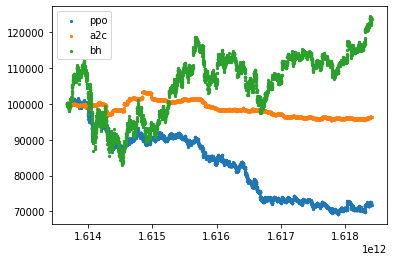

In [ ]:
%matplotlib inline
plt.scatter(df_account_value_ppo['date'],df_account_value_ppo['account_value'], label="ppo", s=5)
plt.scatter(df_account_value_ppo['date'],df_account_value_a2c['account_value'], label="a2c", s=5)
plt.scatter(df_account_value_ppo['date'],df_account_value_ppo['buy_hold_value'], label="bh", s=5)
plt.legend()
#plt.savefig("./" +ticker+"pnl.png")

In [ ]:

#df_account_value_ppo.account_value.plot(ax=ax, style='b-')
# same ax as above since it's automatically added on the right
#df_account_value_ppo.buy_hold_value.plot(ax=ax, style='r-', secondary_y=True)
#df.C.plot(ax=ax3, style='g-')

# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis
#ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],\
#           ['A','B','C'], bbox_to_anchor=(1.5, 0.5))

In [ ]:
print("==============Get PPO Backtest Results===========")
now = str(time.time())
perf_stats_all = backtest_stats(df_account_value_ppo)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+config.RESULTS_DIR+"/perf_stats_all_"+now+'.csv')

==============Get PPO Backtest Results===========
Annual return         -0.003528
Cumulative returns    -0.065009
Annual volatility      0.072133
Sharpe ratio          -0.012966
Calmar ratio          -0.012099
Stability              0.029267
Max drawdown          -0.291584
Omega ratio            0.996290
Sortino ratio         -0.018602
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.122399
Daily value at risk   -0.009092
dtype: float64


In [ ]:
print("==============Get A2C Backtest Results===========")
now = str(time.time())
perf_stats_all = backtest_stats(df_account_value_a2c)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+config.RESULTS_DIR+"/perf_stats_all_"+now+'.csv')

==============Get A2C Backtest Results===========
Annual return          0.034527
Cumulative returns     0.907169
Annual volatility      0.105753
Sharpe ratio           0.373862
Calmar ratio           0.103200
Stability              0.780415
Max drawdown          -0.334566
Omega ratio            1.088511
Sortino ratio          0.549148
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.072336
Daily value at risk   -0.013167
dtype: float64


<a id='6.2'></a>
## 7.2 BackTestPlot

In [ ]:
print("==============Compare to AAPL itself buy-and-hold===========")
%matplotlib inline
#backtest_plot(df_account_value_ppo)

==============Compare to AAPL itself buy-and-hold===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (505, 8)


KeyError: ignored

<a id='6.3'></a>
## 7.3 Baseline Stats

<a id='6.4'></a>
## 7.4 Compare to Stock Market Index

In [ ]:
end = time.time()
print("backtesting took " + str(end - start))
start = time.time()